In [1]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import  train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import Lasso,Ridge,LinearRegression,LogisticRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,accuracy_score,precision_score,recall_score
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from glob import glob
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('concrete_data.csv')
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [4]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [5]:
df.isna().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

<AxesSubplot:>

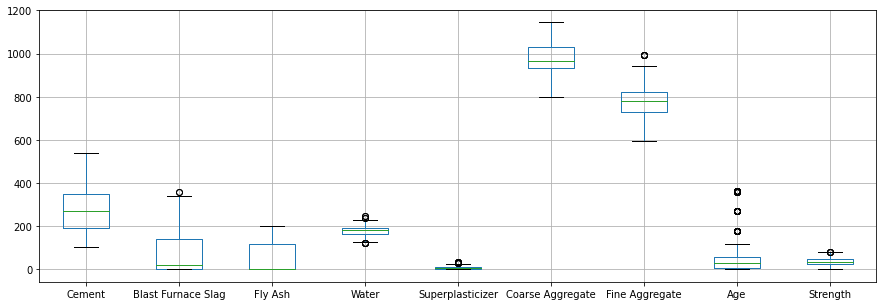

In [6]:
plt.figure(figsize=(15,5))
df.boxplot()

In [7]:
q1=df['Age'].quantile(0.25)
q3=df['Age'].quantile(0.75)
iqr=q3-q1
upper_tail=q3+3*iqr
lower_tail=q1-3*iqr
print("upper_tail:-",upper_tail)
print("lower_tail:-",lower_tail)

upper_tail:- 203.0
lower_tail:- -140.0


In [8]:
df.loc[df['Age']>upper_tail,'Age']=upper_tail

<AxesSubplot:>

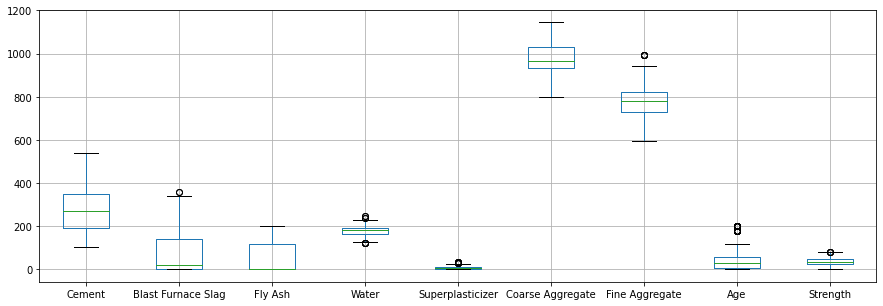

In [9]:
plt.figure(figsize=(15,5))
df.boxplot()

In [10]:
## Here our age is in days and it is common it can goes upto the 365 days and upwards

In [11]:
df.corr()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
Cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.079786,0.497832
Blast Furnace Slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.052144,0.134829
Fly Ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.137272,-0.105755
Water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.253392,-0.289633
Superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.172917,0.366079
Coarse Aggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,0.007351,-0.164935
Fine Aggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.142733,-0.167241
Age,0.079786,-0.052144,-0.137272,0.253392,-0.172917,0.007351,-0.142733,1.000000,0.401575
Strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.401575,1.000000


<AxesSubplot:>

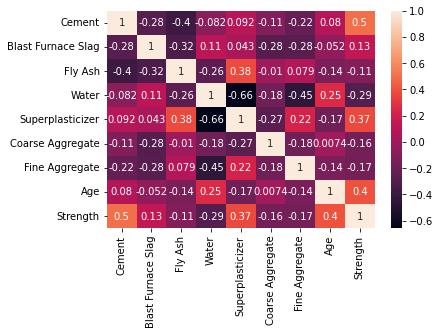

In [12]:
sns.heatmap(df.corr(),annot=True)

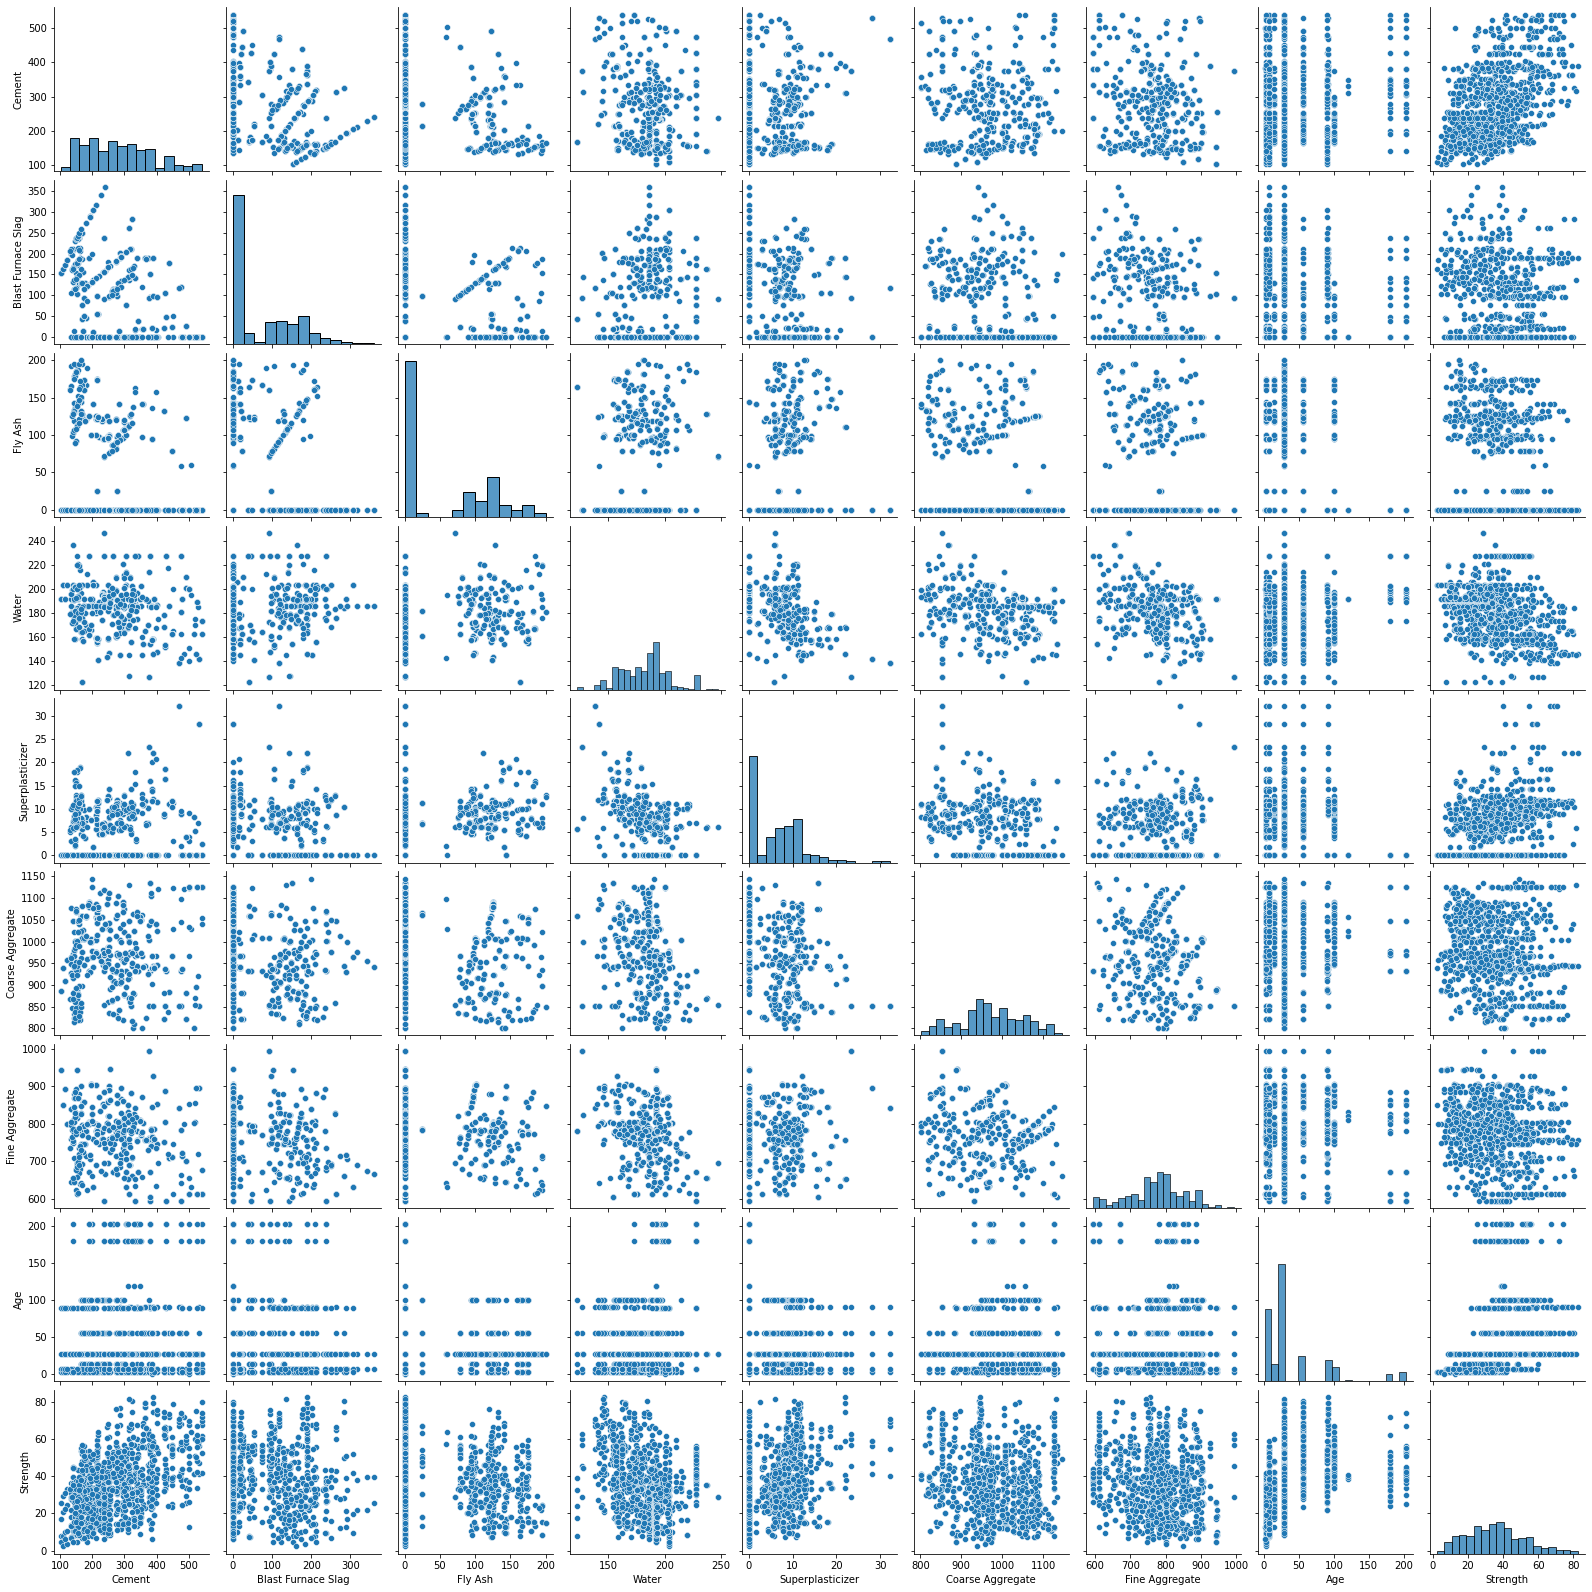

In [13]:
sns.pairplot(df)

In [14]:
x=df.drop('Strength',axis=1)
y=df['Strength']

<AxesSubplot:>

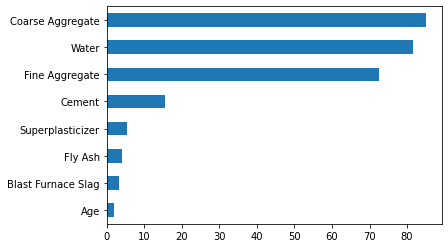

In [15]:
vif=[]
for i in range(x.shape[1]):
    v=variance_inflation_factor(x.to_numpy(),i)
    vif.append(v)
s1=pd.Series(vif,index=x.columns)
s1.sort_values().plot(kind='barh')

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [17]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [18]:
############## Model Evaluation on testing data #################
y_pred=model.predict(x_test)
r2=r2_score(y_test,y_pred)
print("R-Squared value:-",r2)
adjr2=1-(((1-r2)*(x_test.shape[0]-1)))/(x_test.shape[0]-x_test.shape[1]-1)
print("Adjusted R-squared:-",adjr2)
mse=mean_squared_error(y_test,y_pred)
print("Mean Squared error:-",mse)
mae=mean_absolute_error(y_test,y_pred)
print("Mean Squared Error:-",mae)

R-Squared value:- 0.6783766417692831
Adjusted R-squared:- 0.6653157947345332
Mean Squared error:- 84.70904517464996
Mean Squared Error:- 7.300874574016103


In [19]:
residual=y_test-y_pred

<AxesSubplot:xlabel='Strength', ylabel='Density'>

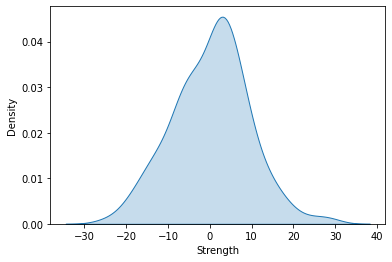

In [20]:
sns.kdeplot(residual,fill=True)

In [21]:
residual.skew()

0.02458451381011206

In [22]:
from scipy.stats import shapiro

In [23]:
_,p_value=shapiro(residual)
print(p_value)

0.35715293884277344


In [24]:
################################## Hyperparameter Tuning ##########################

In [25]:
ridge=Ridge()
param_grid={'alpha':np.arange(1,400,0.5)}
gscv=GridSearchCV(ridge,param_grid,cv=5)
gscv.fit(x_train,y_train)
gscv.best_estimator_


Ridge(alpha=399.5)

In [26]:
ridge=Ridge(alpha=399.5)
ridge.fit(x_train,y_train)
y_pred=ridge.predict(x_test)
r2=r2_score(y_test,y_pred)
print("R-Squared Value:-",r2)

R-Squared Value:- 0.6784878629955993


In [27]:
lasso=Lasso()
param_grid={'alpha':np.arange(1,400,0.5)}
gscv=GridSearchCV(lasso,param_grid,cv=5)
gscv.fit(x_train,y_train)
gscv.best_estimator_

Lasso()

In [28]:
lasso=Lasso()
lasso.fit(x_train,y_train)
y_pred=lasso.predict(x_test)
r2=r2_score(y_test,y_pred)
print("R-Squared Value:-",r2)

R-Squared Value:- 0.6793932405227628


In [29]:
lasso=Lasso()
lasso.fit(x_train,y_train)
y_pred_train=lasso.predict(x_train)
r2=r2_score(y_train,y_pred_train)
print("R-Squared Value:-",r2)

R-Squared Value:- 0.6729380030490509


In [30]:
############################# We are accepting lasso Regression ################

model prediction testing

In [31]:
x.head(1).T

,0
Cement,540.0
Blast Furnace Slag,0.0
Fly Ash,0.0
Water,162.0
Superplasticizer,2.5
Coarse Aggregate,1040.0
Fine Aggregate,676.0
Age,28.0


In [32]:
Cement=540.0
Blast_Furnace_Slag=0.0
Fly_Ash=0.0
Water=162.0
Superplasticizer=2.5
Coarse_Aggregate=1040.0
Fine_Aggregate=676.0
Age=28.0

In [33]:
array=np.zeros(len(x.columns))
array[0]=Cement
array[1]=Blast_Furnace_Slag
array[2]=Fly_Ash
array[3]=Water
array[4]=Superplasticizer
array[5]=Coarse_Aggregate
array[6]=Fine_Aggregate
array[7]=Age
predict=lasso.predict([array])[0].round(2)
print("Predicted Strength will be:-",predict,"kn/sqm")

Predicted Strength will be:- 52.75 kn/sqm


In [34]:
column={"Columns":list(x.columns)}

In [35]:
import pickle
with open("concrete_strenth_model.pkl",'wb')as f:
    pickle.dump(lasso,f)

In [36]:
import json
with open("concrete_strenth_data.json",'w')as f:
    json.dump(column,f)

In [37]:
column

{'Columns': ['Cement',
  'Blast Furnace Slag',
  'Fly Ash',
  'Water',
  'Superplasticizer',
  'Coarse Aggregate',
  'Fine Aggregate',
  'Age']}